<a href="https://colab.research.google.com/github/Jang-jw/DeepLearning/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%9E%A5%EC%9E%AC%EC%9A%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

문제 1-1

답 : 1, 3

문제 1-2

답 : 1, 2, 5

문제 1-3

답 : 4

문제 1-4

답 : 1, 4

# Question 2

문제 2-1

답 : 은닉층 = 연산층 ?

문제 2-2

답 : 2, 3

문제 2-3

답 : 3

문제 2-4

답 : 1, 4, 5

문제 2-5

답 : 1, 3, 4

문제 2-6

답 : 2

# Question 3

In [ ]:
# 데이터 생성

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

X_data=pd.DataFrame(np.random.randint(0,100,size=(100,10)),columns=list('abcdefghij'))
y_data=pd.DataFrame(np.random.randint(0,3,size=(100,3)),columns=list('xyz'))
display(X_data,y_data)

,a,b,c,d,e,f,g,h,i,j
0,2,59,29,92,8,19,63,60,69,84
1,12,64,45,1,6,2,70,86,38,70
2,95,77,6,58,51,16,62,42,16,12
3,96,6,85,26,65,50,5,75,43,50
4,51,81,66,92,61,94,30,83,91,25
...,...,...,...,...,...,...,...,...,...,...
95,76,94,56,97,95,51,62,34,85,19
96,28,34,44,16,79,80,24,59,33,17
97,65,99,79,39,14,51,6,14,55,5
98,7,51,6,25,91,75,70,52,47,45


,x,y,z
0,1,2,2
1,0,0,1
2,2,2,0
3,0,1,0
4,1,1,2
...,...,...,...
95,0,0,0
96,1,0,0
97,0,0,2
98,2,2,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.3,random_state=5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((70, 10), (30, 10), (70, 3), (30, 3))

In [ ]:
# 문제 3-1

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
# 입력층
model.add(Dense(units=128,input_dim=10,activation='relu'))
# 은닉층
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
# 출력층
model.add(Dense(units=3,activation='softmax'))
# 모델 요약
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1408      
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 3)                 99        
                                                                 
Total params: 28355 (110.76 KB)
Trainable params: 28355 (110.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 문제 3-2

# 컴파일
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 학습
h=model.fit(X_train,y_train,epochs=100,batch_size=20,validation_split=0.25)

Epoch 1/100
3/3 [==============================] - 2s 151ms/step - loss: 31.5474 - accuracy: 0.1154 - val_loss: 13.5921 - val_accuracy: 0.2222
Epoch 2/100
3/3 [==============================] - 0s 21ms/step - loss: 13.2940 - accuracy: 0.2115 - val_loss: 13.8056 - val_accuracy: 0.2222
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 16.2804 - accuracy: 0.1538 - val_loss: 17.7233 - val_accuracy: 0.2222
Epoch 4/100
3/3 [==============================] - 0s 32ms/step - loss: 22.6781 - accuracy: 0.1346 - val_loss: 24.0995 - val_accuracy: 0.2778
Epoch 5/100
3/3 [==============================] - 0s 29ms/step - loss: 30.8281 - accuracy: 0.1731 - val_loss: 31.4998 - val_accuracy: 0.3889
Epoch 6/100
3/3 [==============================] - 0s 39ms/step - loss: 41.0952 - accuracy: 0.2692 - val_loss: 42.3620 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 39ms/step - loss: 54.2221 - accuracy: 0.2692 - val_loss: 56.3123 - val_accuracy: 0.3889
Epoch

In [ ]:
# 문제 3-3

model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 29ms/step - loss: 163344.0000 - accuracy: 0.2000


[163344.0, 0.20000000298023224]

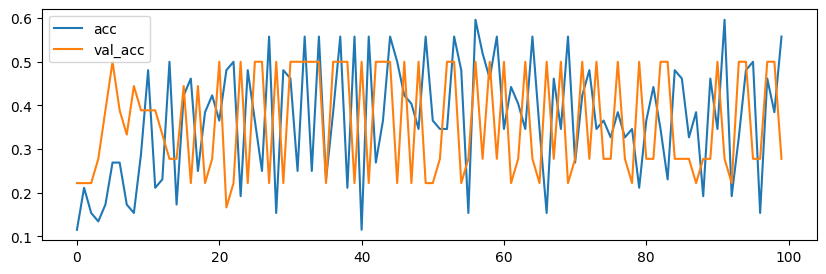

In [ ]:
# 시각화
plt.figure(figsize=(10,3))
plt.plot(h.history['accuracy'],label='acc')
plt.plot(h.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()